# <span style="color:green"> Compilazione ed esecuzione dei programmi </span>
Per la compilazione dei programmi bastano make es1, make es2. Per la loro esecuzione bastano ./es1, ./es2

In [42]:
import numpy as np
from matplotlib import pyplot as plt
import math

# Esercizio 8.1
Ho scritto una classe per la computazione numerica di un integrale con il metodo di Metropolis. Questo si basa sull'importance sampling(discusso nella seconda esercitazione) e il campionamento della distribuzione di probabilità scelta attraverso il metodo di Metropolis, questo ci permette di non dover conoscere la distribuzione di probabilità normalizzata ma è sufficiente una funzione proporzionale ad essa.  
In particolare voliamo utilizzare questo metodo per calcolare il valor medio di un'hamiltoniana nei suoi autostati dell'energia e in particolare nel suo stato fondamentale. Considero il potenziale seguente:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$
Sappiamo che nello stato fondamentale si avrà una funzione d'onda di questo tipo:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$
Si riesce dunque a calcolare il valor medio dell'hamiltoniana in uno stato del tipo di quello scritto sopra nel seguente modo:
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$
L'obiettivo di questo primo esercizio è riuscire a calcolare questo integrale campionando con metropolis il modulo quadro della funzione d'onda per qualsiasi coppia di parametri $\mu$ e $\sigma$.  
Sotto mostro il grafico dell'andamento di un integrale calcolato dal mio programma con la relativa incertezza all'aumentare del numero di blocchi per i parametri $\mu=1$ e $\sigma=0.5$. Ho usato blocchi da $10^4$ passi l'uno.

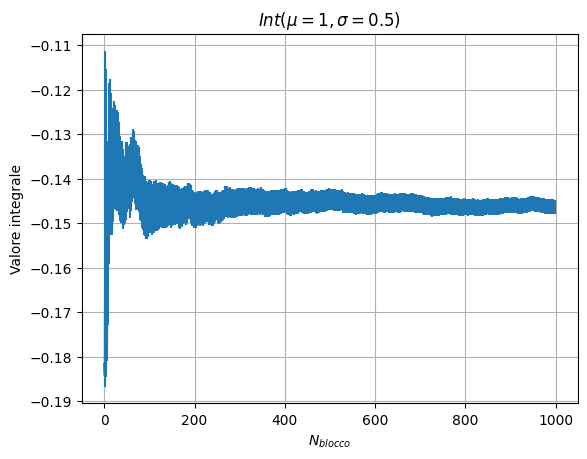

In [32]:
integral = np.loadtxt("integrals.dat",usecols=1)
uncertainty = np.loadtxt("integrals.dat",usecols=2)
nstep = np.loadtxt("integrals.dat",usecols=0, dtype=int)


plt.errorbar(nstep,integral,yerr=uncertainty)
plt.title('$Int(\mu=1,\sigma=0.5)$')
plt.xlabel('$N_{blocco}$')
plt.ylabel('Valore integrale')
plt.grid(True)
plt.show()

# Esercizio 8.2
L'obiettivo di questo esercizio è quello di trovare il ground state dell'hamiltoniana descritta sopra. Per fare questo è sufficiente minimizzare il valore di $<H>_T$ nello spazio delle funzioni del tipo $\Psi_T^{\sigma,\mu}$, in quanto il ground state è lo stato ad energia minima. Cioè bisogna minimizzare l'integrale calcolato nell'esercizio precedente nello spazio dei parametri $\mu$ e $\sigma$, per fare questo si utilizza un algoritmo di ottimizzazione: il simulated annealing. Molto brevemente questo algoritmo scansiona lo spazio dei parametri con proposte di passo di tipo metropolis, inizialmente con un tasso di accettazione delle mosse molto alto e piano piano diminuendo questo tasso di accettazione: l'algoritmo prende il nome dal fatto che questo è il comportamento di un gas di boltzmann che si raffredda lentamente.

Ho costruito l'algoritmo descritto sopra e lo ho usato per trovare la funzione d'onda dello stato fondamentale dell'hamiltoniana. Sotto mostro grafici che rappresentano l'ottimizzazione del sistema nel progredire dei blocchi di ottimizzazione(ad ogni temperatura ho fatto diversi passi nello spazio dei parametri).  
1. Grafico dell'andamento dell'integrale al progredire dei blocchi d'integrazione

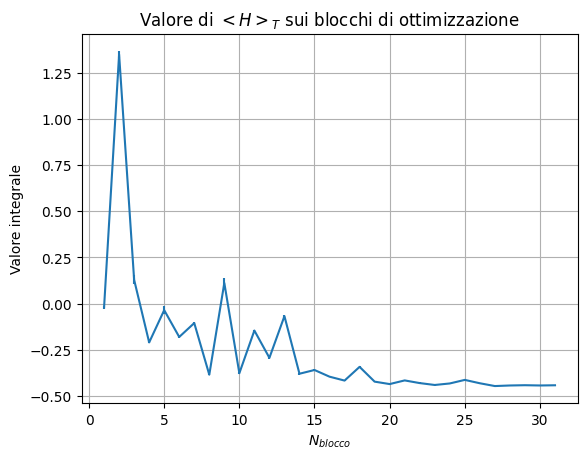

In [33]:
integral = np.loadtxt("int_optimization.dat",usecols=2)
uncertainty = np.loadtxt("int_optimization.dat",usecols=3)
nstep = np.loadtxt("int_optimization.dat",usecols=0, dtype=int)


plt.errorbar(nstep,integral,yerr=uncertainty)
plt.title('Valore di $<H>_T$ sui blocchi di ottimizzazione')
plt.xlabel('$N_{blocco}$')
plt.ylabel('Valore integrale')
plt.grid(True)
plt.show()

Può apparire strano non vedere l'incertezza degli integrali, ma è solo molto piccola perché alla fine di ogni blocco eseguo un integrale più accurato per i parametri di uscita del quel blocco. Inoltre i valori dell' integrale dei primi blocchi sono molto fuori scala rispetto a quelli degli ultimi blocchi.

2. Grafico dell'andamento nello spazio dei parametri al progredire dei blocchi di integrazione 

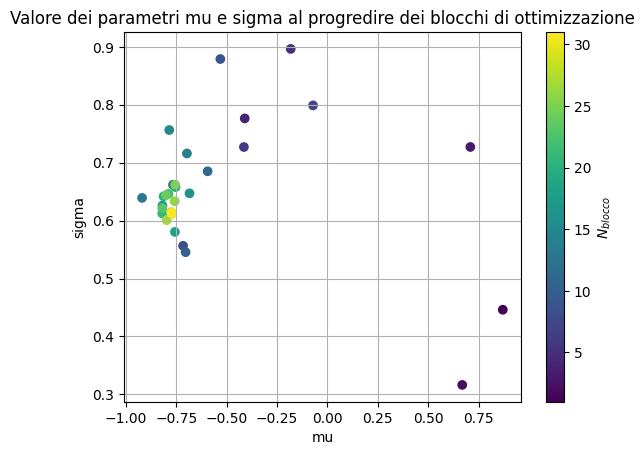

In [34]:
mu = np.loadtxt("parameter_optimization.dat",usecols=2)
sigma = np.loadtxt("parameter_optimization.dat",usecols=3)
nstep = np.loadtxt("parameter_optimization.dat",usecols=0, dtype=int)


plt.scatter(mu,sigma,c=nstep,cmap='viridis')
cbar = plt.colorbar()

plt.title('Valore dei parametri mu e sigma al progredire dei blocchi di ottimizzazione')
plt.xlabel('mu')
plt.ylabel('sigma')
cbar.set_label('$N_{blocco}$')
plt.grid(True)
plt.show()

Si nota che ci sono grossi movimenti nello spazio dei parametri tra un blocco e l'altro per i primi blocchi, ma al progredire di essi i punti tendono a convergere a quello che l'algoritmo ha trovato essere il suo minimo.

Eseguendo l'ottimizzazione si ottengono i seguenti parametri ottimizzati $\mu=-0.773$ e $\sigma=0.613$. Si noti che la funzione d'onda è simmetrica rispetto al valore di $\mu$, quindi la convergenza sul lato dello spazio dei parametri negativo è puramente un caso. Allo stesso modo è possibile che ci sia un minimo dell'integrale più basso di quello trovato in un altro punto dello spazio dei parametri: nessun algoritmo su uno spazio continuo può assicurare la convergenza al minimo globale. Infatti si nota che il valore dell'integrale ottenuto per i parametri ottimizzati è $<H>_T^{opt}=-0.4418 \pm 0.0011$, e il valore dell'energia dello stato fondamentale calcolata con metodo matriciale è $<H>^{GS}=-0.4605$. Il secondo valore è minore di quello trovato con l'ottimizzazione, questo fa pensare che effetivamete il mio algoritmo sia arrivato a convergenza in un minimo locale.

3. Grafico dell'integrale per i parametri ottimizzati a crescere del numero di blocchi d'integrazione

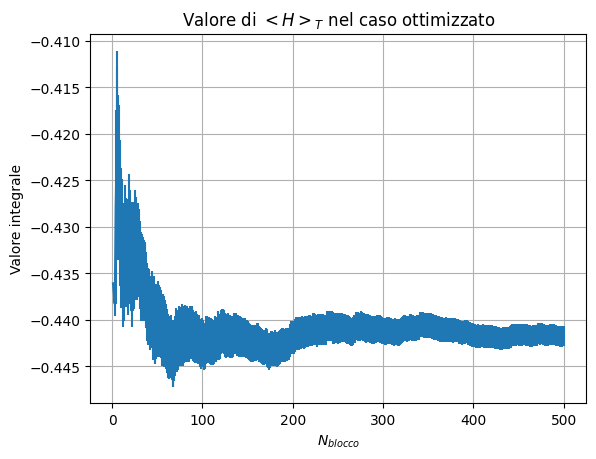

In [35]:
integral = np.loadtxt("opt_int_blocks.dat",usecols=1)
uncertainty = np.loadtxt("opt_int_blocks.dat",usecols=2)
nstep = np.loadtxt("opt_int_blocks.dat",usecols=0, dtype=int)


plt.errorbar(nstep,integral,yerr=uncertainty)
plt.title('Valore di $<H>_T$ nel caso ottimizzato')
plt.xlabel('$N_{blocco}$')
plt.ylabel('Valore integrale')
plt.grid(True)
plt.show()

4. Istogramma del campionamento per il calcolo dell'integrale sopra, lo confronto con la funzione d'onda al quadrato per i parametri $\mu$ e $\sigma$ ottimizzati e la funzione d'onda calcolata attraverso il metodo matriciale.

In [16]:
#calcolo della funzione d'onda e dell'energia dello stato fondamentale con il metodo matriciale

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])

Ground state energy:  -0.46046587969271563


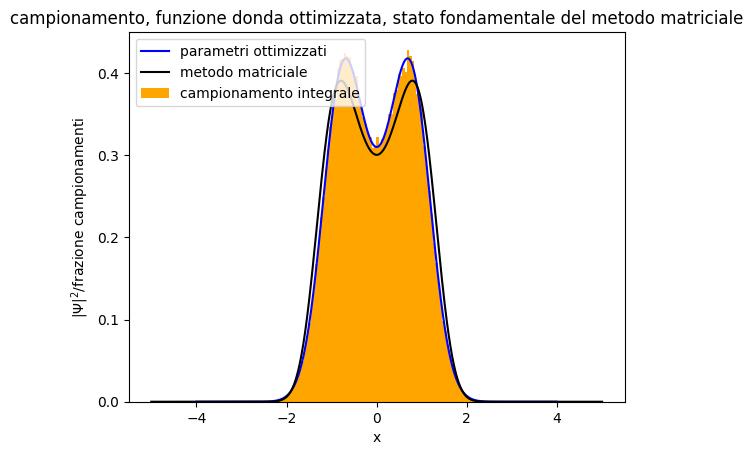

In [41]:
val = np.loadtxt("campionamento.dat",usecols=0)


#Valori per la stima dell'integrale
mu = -0.773169
sigma = 0.613286
x_opt = np.arange(-4, 4, 0.01)
y_opt = np.array([(math.exp(-math.pow((z-mu), 2)/(2 * math.pow(sigma, 2))) + math.exp(-math.pow((z+mu), 2)/(2 * math.pow(sigma, 2))))**2 for z in x_opt])


plt.plot(x_opt, 0.38*y_opt, color = 'blue',label='parametri ottimizzati')
plt.plot(x,(psi[0])**2, color='black',label='metodo matriciale')
plt.hist(val, bins=100, density=True, facecolor='orange', label='campionamento integrale')

plt.xlabel('x')
plt.ylabel('$|\Psi|^2$/frazione campionamenti')
plt.title('campionamento, funzione donda ottimizzata, stato fondamentale del metodo matriciale')
plt.legend(loc='upper left')

plt.show()

C'è ottimo accordo tra il mio campionamento e il modulo quadro della funzione d'onda per i miei parametri ottimizzati. Si  nota però che la funzione d'onda dello stato fondamentale calcolato con il metodo matriciale è sensibilmente diversa: questo è un ulteriore indizio della convergenza a un minimo locale dicussa sopra, in compenso so nota anche che esse non sono radicalmente diverse, quindi i valori trovati di $\mu$ e $\sigma$ non possono essere troppo lontani da quelli del minimo globale.